# Ejercicio 3
A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales y el tiempo promedio en minutos para completar el recorrido:

| Horas entrenamiento | Tiempo promedio (min) |
|---------------------|-----------------------|
| 2                   | 30.5                  |
| 3                   | 29.3                  |
| 4                   | 26.7                  |
| 4                   | 26.0                  |
| 5                   | 25.5                  |
| 6                   | 24.7                  |
| 6                   | 23.5                  |
| 7                   | 23.0                  |
| 7                   | 22.5                  |
| 8                   | 21.0                  |
| 10                  | 21.0                  |
| 10                  | 20.5                  |

A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales. Responder:

## Inciso A
Calcule la correlación lineal y dibuje el diagrama de dispersión. ¿Será útil la recta de regresión?

---

Sera util, pues se puede ver que a mas horas de entrenamiento, menos tiempo se demoran.

,Horas entrenamiento,Tiempo promedio (min)
Horas entrenamiento,1.000000,-0.959746
Tiempo promedio (min),-0.959746,1.000000


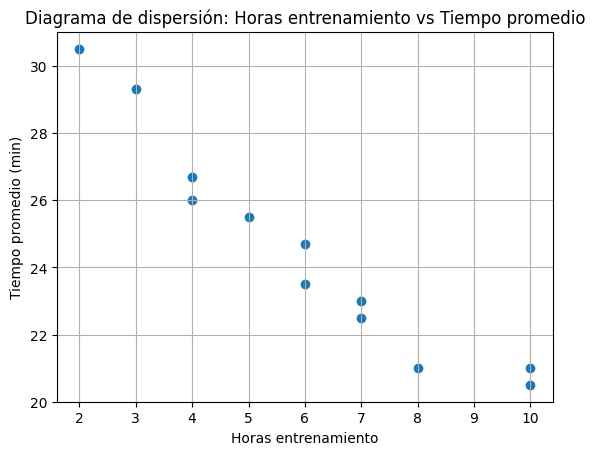

In [47]:
import numpy as np
import pandas as pd

# Datos de la tabla
horas_entrenamiento = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10])
tiempo_promedio = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5])

data = pd.DataFrame({
  'Horas entrenamiento': horas_entrenamiento,
  'Tiempo promedio (min)': tiempo_promedio
})

display(data.corr())

import matplotlib.pyplot as plt

plt.scatter(data['Horas entrenamiento'], data['Tiempo promedio (min)'])
plt.xlabel('Horas entrenamiento')
plt.ylabel('Tiempo promedio (min)')
plt.title('Diagrama de dispersión: Horas entrenamiento vs Tiempo promedio')
plt.grid(True)
plt.show()

## Inciso b
Indique la ecuación del error cuadrático medio (ECM) a minimizar con gradiente descendente.

In [48]:
def calcular_ecm(y_true, y_pred):
  """
  Calcula el error cuadrático medio (ECM) entre los valores reales y predichos.
  """
  n = len(y_true)
  return np.mean((y_true - y_pred) ** 2)


## Inciso c
Indique la ecuación de error que se minimiza con gradiente descendente estocástico.  
¿Cuál es su ventaja respecto a b)?

---

La ventaja es que no depende de todos los valores, solo del actual/anterior?.

In [49]:
def calcular_ecm(y_true, y_pred):
  return (y_true - y_pred) ** 2


## Inciso d
Use gradiente descendente estocástico para obtener los coeficientes de la recta de regresión.

Coeficiente w: -0.9125


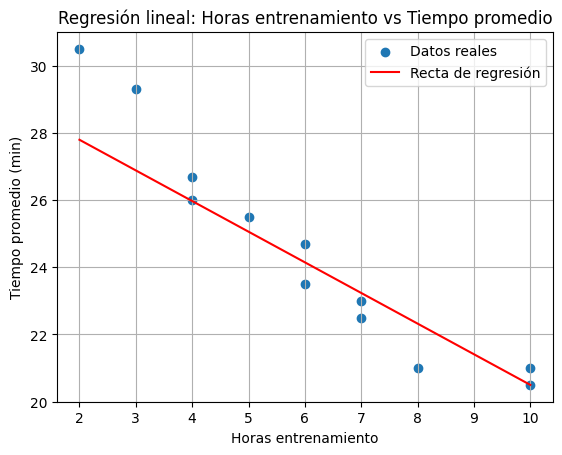

In [50]:
# Gradiente descendente estocástico para regresión lineal
np.random.seed(0)
w = 0.0
b = 0.0
lr = 0.01
epochs = 200

X = data['Horas entrenamiento'].values
Y = data['Tiempo promedio (min)'].values
n = len(X)

for epoch in range(epochs):
  for i in range(n):
    y_pred = w * X[i] + b
    error = Y[i] - y_pred
    # Actualización de parámetros
    w += lr * error * X[i]
    b += lr * error

print(f"Coeficiente w: {w:.4f}")
# Graficar la recta de regresión junto con el diagrama de dispersión
plt.scatter(X, Y, label='Datos reales')
plt.plot(X, w * X + b, color='red', label='Recta de regresión')
plt.xlabel('Horas entrenamiento')
plt.ylabel('Tiempo promedio (min)')
plt.title('Regresión lineal: Horas entrenamiento vs Tiempo promedio')
plt.legend()
plt.grid(True)
plt.show()

## Inciso e
Use la recta obtenida en d) para predecir el tiempo promedio de un corredor que entrena 9 horas semanales.

In [51]:
# Usamos la recta obtenida: y = w * x + b
horas_prediccion = 9
tiempo_predicho = w * horas_prediccion + b
print(f"Tiempo promedio predicho para {horas_prediccion} horas de entrenamiento: {tiempo_predicho:.2f} minutos")

Tiempo promedio predicho para 9 horas de entrenamiento: 21.41 minutos


# Ejercicio 4

Con el dataset `ccpp.csv`, se entrenaron 5 combinadores lineales para predecir PE en función de AT.  
Indique cuáles tienen menor error cuadrático medio:

a) W = -2.00 ; b = 500  
b) W = -2.21 ; b = 498  
c) W = -2.30 ; b = 497  
d) W = -2.22 ; b = 496.5  
e) W = -2.16 ; b = 496.91


In [52]:
import sys
DATA_PATH="./Data/"
SOURCE_PATH="../../Fuentes/"

data=pd.read_csv(DATA_PATH+"CCPP.csv")

weights = [
  {"W": -2.00, "b": 500},
  {"W": -2.21, "b": 498},
  {"W": -2.30, "b": 497},
  {"W": -2.22, "b": 496.5},
  {"W": -2.16, "b": 496.91}
]

# Calcula el ECM para cada combinador lineal y muestra los resultados
ecms = []
for params in weights:
  W = params["W"]
  b = params["b"]
  y_pred = W * data["AT"] + b
  ecm = np.mean((data["PE"] - y_pred) ** 2)
  ecms.append(ecm)
  print(f"W={W:.2f}, b={b}: ECM={ecm:.2f}")

# Indica el menor ECM
min_idx = np.argmin(ecms)
print(f"\nEl combinador con menor ECM es: W={weights[min_idx]['W']}, b={weights[min_idx]['b']}, ECM={ecms[min_idx]:.2f}")

W=-2.00, b=500: ECM=71.16
W=-2.21, b=498: ECM=29.56
W=-2.30, b=497: ECM=36.92
W=-2.22, b=496.5: ECM=31.79
W=-2.16, b=496.91: ECM=29.45

El combinador con menor ECM es: W=-2.16, b=496.91, ECM=29.45


In [53]:
sys.path.append(SOURCE_PATH)
sys.path.append(DATA_PATH)

from ClassNeuronaLineal import NeuronaLineal

ecms = []  # Reinicia la lista para evitar duplicados

for params in weights:
    neurona = NeuronaLineal()
    neurona.w_ = np.array([params["W"]])
    neurona.b_ = params["b"]
    y_pred = neurona.predict(data[["AT"]].values)
    ecm = np.mean((data["PE"] - y_pred) ** 2)
    ecms.append(ecm)
    print(f"W={params['W']:.2f}, b={params['b']}: ECM={ecm:.2f}")

min_idx = np.argmin(ecms)
print(f"\nEl combinador con menor ECM es: W={weights[min_idx]['W']}, b={weights[min_idx]['b']}, ECM={ecms[min_idx]:.2f}")

W=-2.00, b=500: ECM=71.16
W=-2.21, b=498: ECM=29.56
W=-2.30, b=497: ECM=36.92
W=-2.22, b=496.5: ECM=31.79
W=-2.16, b=496.91: ECM=29.45

El combinador con menor ECM es: W=-2.16, b=496.91, ECM=29.45


# Ejercicio 5

A partir de los ejemplos del archivo `automobile-simple.csv`, utilizado en la práctica anterior, se entrenará un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor (atributo “engine-size”)

## Inciso a
Complete los datos faltantes del atributo price usando el valor promedio.


In [56]:
data = pd.read_csv(DATA_PATH+'automobile-simple.csv')

# Reemplaza los valores faltantes en 'price' por el promedio de la columna
data['price']=data['price'].fillna(data['price'].mean())

display(data['price'].isna().value_counts())

price
False    205
Name: count, dtype: int64

## Inciso b
Entrene un combinador lineal para predecir price en función de engine-size:

i.   Sin normalizar  
ii.  Normalizando linealmente  
iii. Normalizando con media y desvío  

Analice el impacto de la normalización en el entrenamiento.

Sin normalizar: w=162.8360, b=-7457.95
Normalización lineal: w=1.0712, b=-0.07
Normalización z-score: w=0.8618, b=-0.00


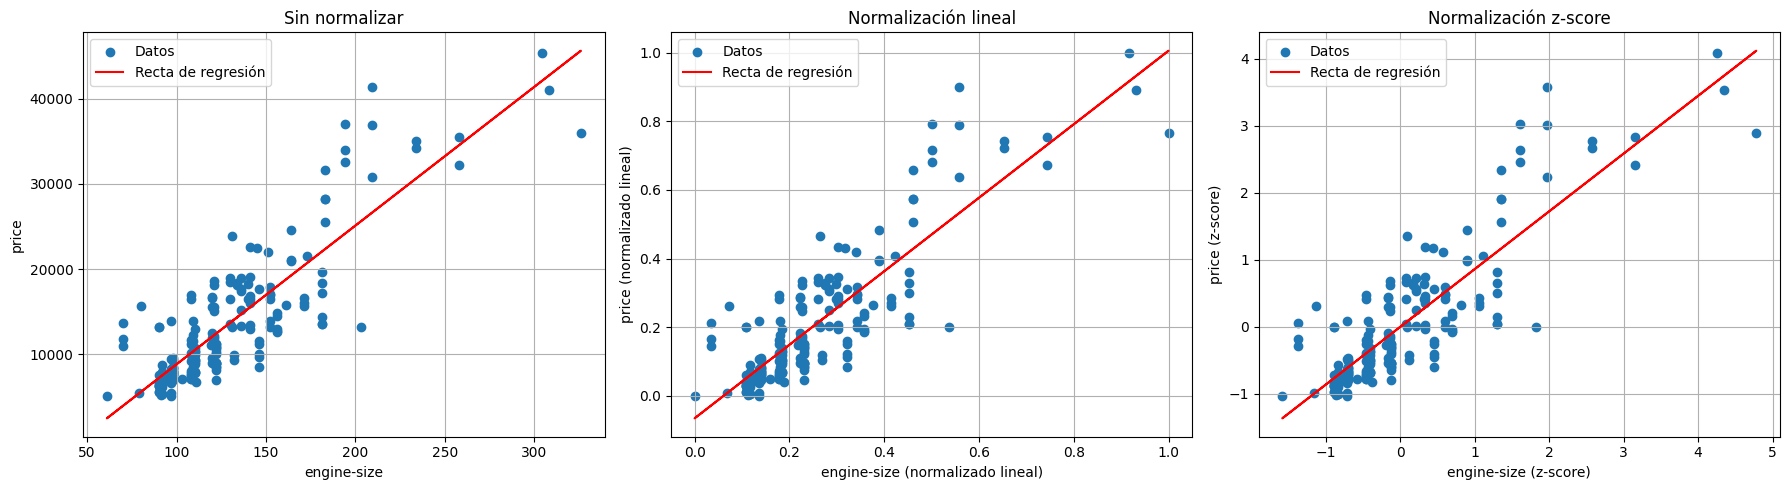

In [59]:
def normalizar_lineal(col):
  """
  Normalización lineal [0, 1] de una columna pandas.
  """
  return (col - col.min()) / (col.max() - col.min())

def normalizar_media_desvio(col):
  """
  Normalización con media y desvío estándar (z-score) de una columna pandas.
  """
  return (col - col.mean()) / col.std()

# i. Sin normalizar
X_sin_norm = data['engine-size'].values
Y_sin_norm = data['price'].values

w_sin_norm = np.sum((X_sin_norm - X_sin_norm.mean()) * (Y_sin_norm - Y_sin_norm.mean())) / np.sum((X_sin_norm - X_sin_norm.mean()) ** 2)
b_sin_norm = Y_sin_norm.mean() - w_sin_norm * X_sin_norm.mean()

print(f"Sin normalizar: w={w_sin_norm:.4f}, b={b_sin_norm:.2f}")

# ii. Normalizando linealmente
X_norm_lin = normalizar_lineal(data['engine-size'])
Y_norm_lin = normalizar_lineal(data['price'])
w_norm_lin = np.sum((X_norm_lin - X_norm_lin.mean()) * (Y_norm_lin - Y_norm_lin.mean())) / np.sum((X_norm_lin - X_norm_lin.mean()) ** 2)
b_norm_lin = Y_norm_lin.mean() - w_norm_lin * X_norm_lin.mean()

print(f"Normalización lineal: w={w_norm_lin:.4f}, b={b_norm_lin:.2f}")

# iii. Normalizando con media y desvío
X_norm_z = normalizar_media_desvio(data['engine-size'])
Y_norm_z = normalizar_media_desvio(data['price'])
w_norm_z = np.sum((X_norm_z - X_norm_z.mean()) * (Y_norm_z - Y_norm_z.mean())) / np.sum((X_norm_z - X_norm_z.mean()) ** 2)
b_norm_z = Y_norm_z.mean() - w_norm_z * X_norm_z.mean()

print(f"Normalización z-score: w={w_norm_z:.4f}, b={b_norm_z:.2f}")

plt.figure(figsize=(18, 5))

# Sin normalizar
plt.subplot(1, 3, 1)
plt.scatter(X_sin_norm, Y_sin_norm, label='Datos')
plt.plot(X_sin_norm, w_sin_norm * X_sin_norm + b_sin_norm, color='red', label='Recta de regresión')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Sin normalizar')
plt.legend()
plt.grid(True)

# Normalización lineal
plt.subplot(1, 3, 2)
plt.scatter(X_norm_lin, Y_norm_lin, label='Datos')
plt.plot(X_norm_lin, w_norm_lin * X_norm_lin + b_norm_lin, color='red', label='Recta de regresión')
plt.xlabel('engine-size (normalizado lineal)')
plt.ylabel('price (normalizado lineal)')
plt.title('Normalización lineal')
plt.legend()
plt.grid(True)

# Normalización z-score
plt.subplot(1, 3, 3)
plt.scatter(X_norm_z, Y_norm_z, label='Datos')
plt.plot(X_norm_z, w_norm_z * X_norm_z + b_norm_z, color='red', label='Recta de regresión')
plt.xlabel('engine-size (z-score)')
plt.ylabel('price (z-score)')
plt.title('Normalización z-score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
